In [13]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [14]:
F=np.array([0.99,0,0,0.99]).reshape(2,2)
F

array([[0.99, 0.  ],
       [0.  , 0.99]])

In [15]:
B=np.array([0.1,0.2])

In [77]:
H=np.array([0.2,0,0,0.2]).reshape(2,2)
H

array([[0.2, 0. ],
       [0. , 0.2]])

In [78]:
X=np.zeros((100,2))
X
Y=np.zeros((100,2))
Y

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.

In [79]:
for i in range(1,100):
    X[i]=F@X[i-1]+B+sp.stats.norm(0,0.3).rvs(2)
    Y[i]=H@X[i]+sp.stats.norm(0,0.3/5).rvs(2)

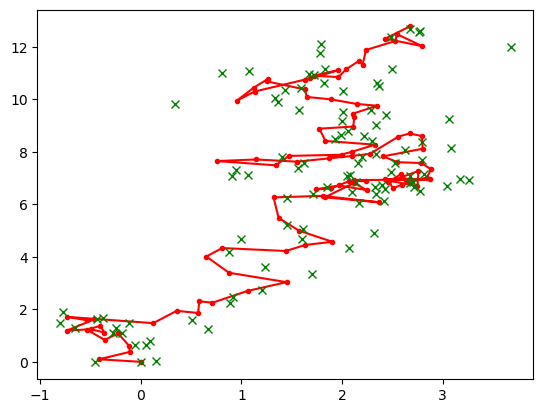

In [80]:
plt.plot(X[:,0],X[:,1],'r.-')
plt.plot(5*Y[:,0],5*Y[:,1],'gx')

In [81]:
XHat=np.zeros((100,2))
x=XHat[0]
#x=np.array([10,10])

In [82]:
Q=np.diag(np.array([0.09,0.09]))
Q

array([[0.09, 0.  ],
       [0.  , 0.09]])

In [83]:
R=np.diag(np.array([1,1]))*(0.3/5)**2
R

array([[0.0036, 0.    ],
       [0.    , 0.0036]])

In [84]:
p=Q.copy()

In [89]:
for i in range(1,100):
    x=F@x+B+sp.stats.norm(0,0.3).rvs(2)   #TU of xHat1Sub
    p=F@p@F.T+Q                           #TU of pSub
    K=p@H.T@np.linalg.inv(H@p@H.T+R)
    e=Y[i]-H@x
    x=x+K@e
    XHat[i]=x
    p=(np.eye(2)-K@H)@p

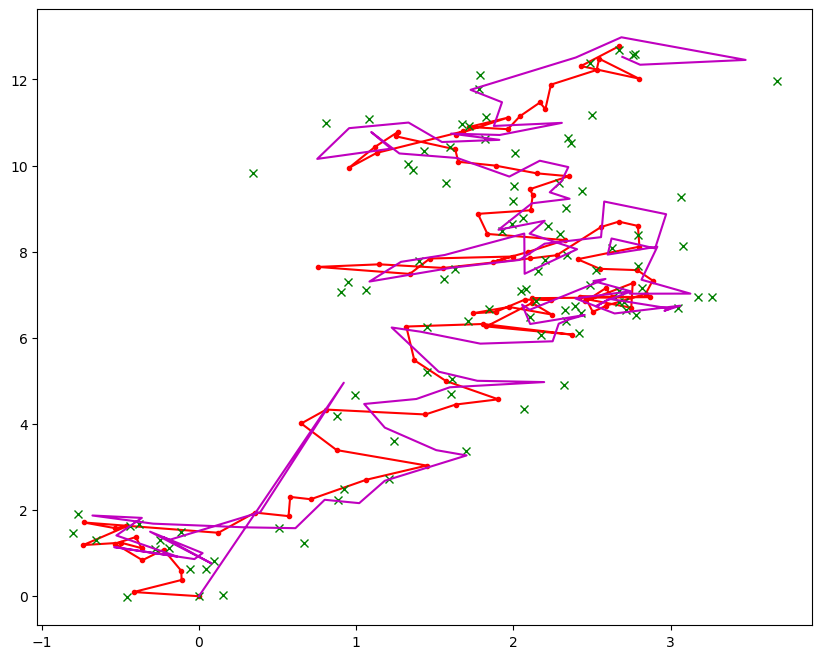

In [90]:
plt.figure(figsize=(10,8))
plt.plot(X[:,0],X[:,1],'r.-')
plt.plot(5*Y[:,0],5*Y[:,1],'gx')
plt.plot(XHat[:,0],XHat[:,1],'m-')

In [91]:
chi=0
for i in range(10,100):
    chi+=((X[i]-XHat[i])**2)/XHat[i]

In [92]:
chi

array([-0.04861988,  1.18954522])